# Pair Programming Asunciones Regresión Lineal

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sidetable

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv("datos/soci_econ_country_profiles_v2.csv", index_col=0)
df.head(2)

,country,Region,Population in thousands (2017),GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),Forested area (% of land area),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Adjusted net national income per capita (constant 2010 US$),Commercial service exports (current US$),Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),Education: Secondary gross enrol. ratio (f per 100 pop.),Education: Secondary gross enrol. ratio (m per 100 pop.),Education: Tertiary gross enrol. ratio (f per 100 pop.),Education: Tertiary gross enrol. ratio (m per 100 pop.),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)"
0,Argentina,SouthAmerica,44271,14564.5,2.0,73.1,119,119,1.0,91.8,1.0,2.3,13.7,4.8,38.9,256,4.7,85,99.0,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58.40,9094.367252,1.527416e+10,112.887108,9.124315,0.611,NaN,79.726,72.924,76.372,74.4,110.3,103.4,102.9,63.5,96.2,98.3,24.9,15.4
1,Australia,Oceania,24451,51352.2,2.7,76.1,111,111,1.5,89.4,1.5,1.9,3.9,9.4,28.7,948,15.3,222,100.0,176.54,101.94,57.58,74.25,80.66,9.24,34.73,24.58,72.79,70.87,1.41,80.66,42.54,62.39,76.87,77.12,101.94,43073.967170,6.429639e+10,115.686785,9.205948,0.803,1.948647,84.600,80.500,82.500,70.7,133.6,141.3,106.3,75.4,100.0,100.0,19.0,21.0


In [4]:
df.drop(["Life expectancy at birth, female (years)", "Life expectancy at birth, male (years)"], axis =1, inplace = True)

In [6]:
df.head()

,country,Region,Population in thousands (2017),GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),Forested area (% of land area),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Adjusted net national income per capita (constant 2010 US$),Commercial service exports (current US$),Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),Education: Secondary gross enrol. ratio (f per 100 pop.),Education: Secondary gross enrol. ratio (m per 100 pop.),Education: Tertiary gross enrol. ratio (f per 100 pop.),Education: Tertiary gross enrol. ratio (m per 100 pop.),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)"
0,Argentina,SouthAmerica,44271,14564.5,2.0,73.1,119,119,1.0,91.8,1.0,2.3,13.7,4.8,38.9,256,4.7,85,99.0,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58.40,9094.367252,1.527416e+10,112.887108,9.124315,0.611,NaN,76.372000,74.4,110.3,103.4,102.9,63.5,96.2,98.3,24.9,15.4
1,Australia,Oceania,24451,51352.2,2.7,76.1,111,111,1.5,89.4,1.5,1.9,3.9,9.4,28.7,948,15.3,222,100.0,176.54,101.94,57.58,74.25,80.66,9.24,34.73,24.58,72.79,70.87,1.41,80.66,42.54,62.39,76.87,77.12,101.94,43073.967170,6.429639e+10,115.686785,9.205948,0.803,1.948647,82.500000,70.7,133.6,141.3,106.3,75.4,100.0,100.0,19.0,21.0
2,Austria,WesternEurope,8736,44117.7,4.7,69.7,108,108,0.6,66.0,0.4,1.4,3.3,11.2,30.6,118,6.9,158,100.0,190.37,95.66,80.75,80.91,71.52,9.66,26.27,21.90,62.13,59.08,1.69,71.52,25.86,49.64,65.86,66.94,95.66,39557.667995,6.640396e+10,113.999737,10.396617,0.793,2.081269,81.643902,65.8,97.6,102.4,89.2,74.3,100.0,100.0,14.1,25.1
3,Belarus,EasternEurope,9468,5750.8,9.6,58.4,122,122,0.0,76.7,0.0,1.6,3.6,5.7,34.5,25,6.7,122,99.9,119.23,36.43,77.74,53.76,33.84,18.73,27.66,39.64,20.07,587.51,0.17,33.84,12.21,23.47,27.19,37.60,36.43,5923.223118,7.883700e+09,NaN,5.925786,NaN,6.031837,74.129268,67.8,106.4,107.8,100.7,75.9,94.1,95.2,16.7,21.3
4,Belgium,WesternEurope,11429,40277.8,1.2,77.6,108,107,0.6,97.9,0.5,1.8,3.5,10.6,38.0,37,8.3,196,100.0,160.52,91.02,55.49,78.92,75.36,6.96,36.26,48.92,75.16,44.69,2.24,75.36,29.64,53.44,65.77,82.34,91.02,38493.272444,1.151674e+11,113.128903,10.338669,0.757,2.125971,81.492683,58.9,177.7,156.4,85.4,65.0,99.5,99.4,17.1,24.6


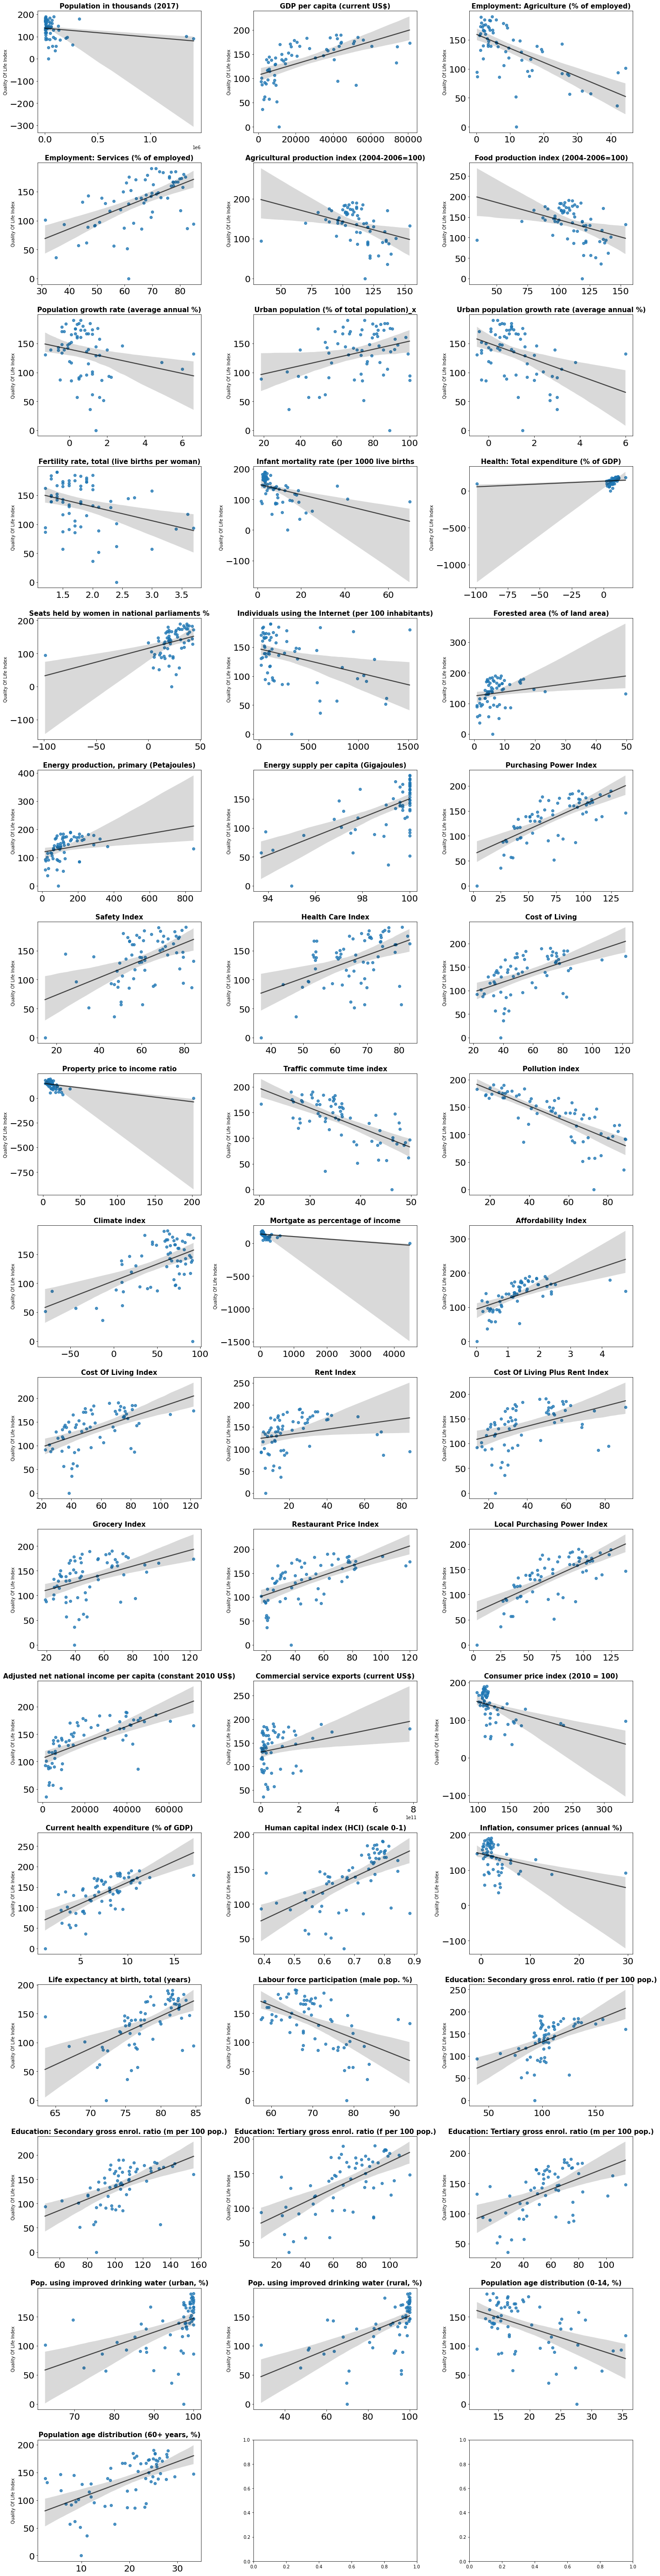

In [15]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 17, ncols = 3, figsize = (20, 80))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('Quality Of Life Index', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'Quality Of Life Index',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

In [ ]:
columnas_drop = [""]

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:
- Normalidad (ya la deberíais haber evaluado)
- Homogeneidad de varianzas
- Independencia de las variables

Cada asunción la deberéis testar de forma visual y analítica.